# Week 2 handin

## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs


## Status
All exercises in exercise 1 are done. The extra exercise 2 is not done.

## Solution part 1

In [165]:
import csv
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

## Exercie 5A - What is the change in pct of divorced danes from 2008 to 2020?
def api_to_csv(url, filename):
    response = requests.get(url)
    fname = response.headers['Content-Disposition'].split('=')[1]
    fname = 'modules/data_files/' + filename

    if response.ok:  # status_code == 200:
        with open(fname, 'wb') as f:
            f.write(response.content)   

url5a = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2021K1&CIVILSTAND=F'
filename5a = 'divorced5a.csv'
api_to_csv(url5a, filename5a)
data5a = pd.read_csv('modules/data_files/divorced5a.csv', delimiter=";")
##data5a.head()
data_skilt = data5a['INDHOLD']
##print(data5a.iloc[0,-1])
print("Exercise 5A -What is the change in pct of divorced danes from 2008 to 2020?: ",((data_skilt[1] - data_skilt[0])/data_skilt[0]) * 100)

Exercise 5A -What is the change in pct of divorced danes from 2008 to 2020?:  29.435438740486497


Exercise 5b - Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?:  {'København': 65.4896415941411, 'Aalborg': 54.82011764169441, 'Esbjerg': 47.759268558762926, 'Odense': 55.196448433803994, 'Aarhus': 59.942282391885584}


Text(0, 0.5, 'Percent')

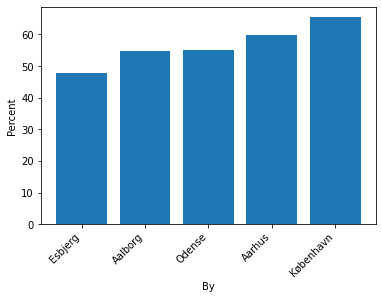

In [170]:

url5b = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K4&OMR%C3%85DE=101%2C851%2C561%2C461%2C751&CIVILSTAND=TOT%2CU'
filename5b = 'nevermarried20205b.csv'
api_to_csv(url5b, filename5b)

def percent(tal1, tal2):
    return (tal1/tal2)*100

biggest_cities = {1: 'København', 2: 'Aalborg', 3: 'Esbjerg', 4: 'Odense', 5: 'Aarhus'}

## Bad solution -- hardcode
nevermarried_dict = {}
data5b = pd.read_csv('modules/data_files/nevermarried20205b.csv', delimiter=";")
a = data5b['INDHOLD']
i = 1
j = 0

for n in biggest_cities.values():
    nevermarried_dict[n] = (percent(a[i], a[j]))
    i += 2
    j += 2
    

    

print("Exercise 5b - Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?: ", nevermarried_dict)
sorted_percent = sorted(nevermarried_dict.values())
sorted_c = [x for _, x in sorted(zip(nevermarried_dict.values(), nevermarried_dict.keys()))]
plt.bar(sorted_c, sorted_percent)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.xlabel('By')
plt.ylabel('Percent')





{0: 102, 1: 232, 2: 424}
